In [1]:
import os

# Define the path where you want to store the combined dataset
base_dir = "/mnt/data/papaya_dataset"

# Create the directory (if it doesn't exist)
os.makedirs(base_dir, exist_ok=True)

print(f"Directory '{base_dir}' created successfully!")


Directory '/mnt/data/papaya_dataset' created successfully!


In [10]:
import os
import zipfile
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define dataset paths
zip_files = {
    "C:/Users/hp/Desktop/cyberpunker/Papaya_Ripe.zip": "Ripe",
    "C:/Users/hp/Desktop/cyberpunker/Papaya_Classification.zip": "Classification",
    "C:/Users/hp/Desktop/cyberpunker/Papaya_Leaf.zip": "Leaf"
}

# Create a directory to store the combined dataset
base_dir = "C:/Users/hp/Desktop/cyberpunker/papaya_dataset"
os.makedirs(base_dir, exist_ok=True)

# Extract images and assign labels
for zip_path, label in zip_files.items():
    if os.path.exists(zip_path):
        extract_path = os.path.join(base_dir, label)
        os.makedirs(extract_path, exist_ok=True)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Extraction complete for {zip_path}. Images are labeled and organized.")
    else:
        print(f"No such file or directory: '{zip_path}'")

# Splitting data into train, validation, and test sets
data_dir = base_dir
target_size = (150, 150)
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 train-validation split
)

# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Create the validation data generator
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Determine the number of classes
num_classes = len(train_generator.class_indices)

# Build the CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

print("Model training complete!")

Extraction complete for C:/Users/hp/Desktop/cyberpunker/Papaya_Ripe.zip. Images are labeled and organized.
Extraction complete for C:/Users/hp/Desktop/cyberpunker/Papaya_Classification.zip. Images are labeled and organized.
Extraction complete for C:/Users/hp/Desktop/cyberpunker/Papaya_Leaf.zip. Images are labeled and organized.
Found 1118 images belonging to 6 classes.
Found 278 images belonging to 6 classes.
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.1959 - loss: 2.0046 - val_accuracy: 0.2698 - val_loss: 1.3848
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.2709 - loss: 1.4119 - val_accuracy: 0.2698 - val_loss: 1.3507
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.2702 - loss: 1.3423 - val_accuracy: 0.2590 - val_loss: 1.3157
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.3054 - loss: 1.3133 - val_accuracy: 0.2482 - val_loss: 1.3278
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.2930 - loss: 1.327

: 

: 

: 

In [11]:
import os
print(os.listdir(base_dir))  # Check class folders
for category in os.listdir(base_dir):
    print(f"{category}: {len(os.listdir(os.path.join(base_dir, category)))} images")


['Classification', 'Leaf', 'Papaya_Classification', 'Papaya_Image', 'Papaya_Leaf', 'Ripe']
Classification: 1 images
Leaf: 1 images
Papaya_Classification: 1 images
Papaya_Image: 3 images
Papaya_Leaf: 98 images
Ripe: 1 images


: 

In [3]:
import os

# Define the path to the category directory
category_path = "C:/Users/hp/Desktop/cyberpunker/papaya_dataset/Ripe"  # Update this path as needed

# List all image files in the category directory
image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

print(image_files)


[]


In [4]:
import os

# Define the base directory
base_dir = "C:/Users/hp/Desktop/cyberpunker/papaya_dataset"

for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    print(f"\n🔹 Checking category: {category}")

    if os.path.isdir(category_path):
        sub_items = os.listdir(category_path)
        print(f"  Contains {len(sub_items)} items")
        print("  Sample items:", sub_items[:5])  # Show first 5 items

        # List all image files in the category directory
        image_files = [f for f in sub_items if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
        print(f"  Found {len(image_files)} image files")
        print("  Sample image files:", image_files[:5])  # Show first 5 image files



🔹 Checking category: Classification
  Contains 1 items
  Sample items: ['Papaya_Classification']
  Found 0 image files
  Sample image files: []

🔹 Checking category: Leaf
  Contains 1 items
  Sample items: ['Papaya_Leaf']
  Found 0 image files
  Sample image files: []

🔹 Checking category: Papaya_Classification
  Contains 1 items
  Sample items: ['papaya_image']
  Found 0 image files
  Sample image files: []

🔹 Checking category: Papaya_Image
  Contains 3 items
  Sample items: ['mature', 'partiallymature', 'unmature']
  Found 0 image files
  Sample image files: []

🔹 Checking category: Papaya_Leaf
  Contains 98 items
  Sample items: ['1.jpg', '10.jpg', '100.jpg', '11.jpg', '12.jpg']
  Found 98 image files
  Sample image files: ['1.jpg', '10.jpg', '100.jpg', '11.jpg', '12.jpg']

🔹 Checking category: Ripe
  Contains 1 items
  Sample items: ['Papaya_Image']
  Found 0 image files
  Sample image files: []


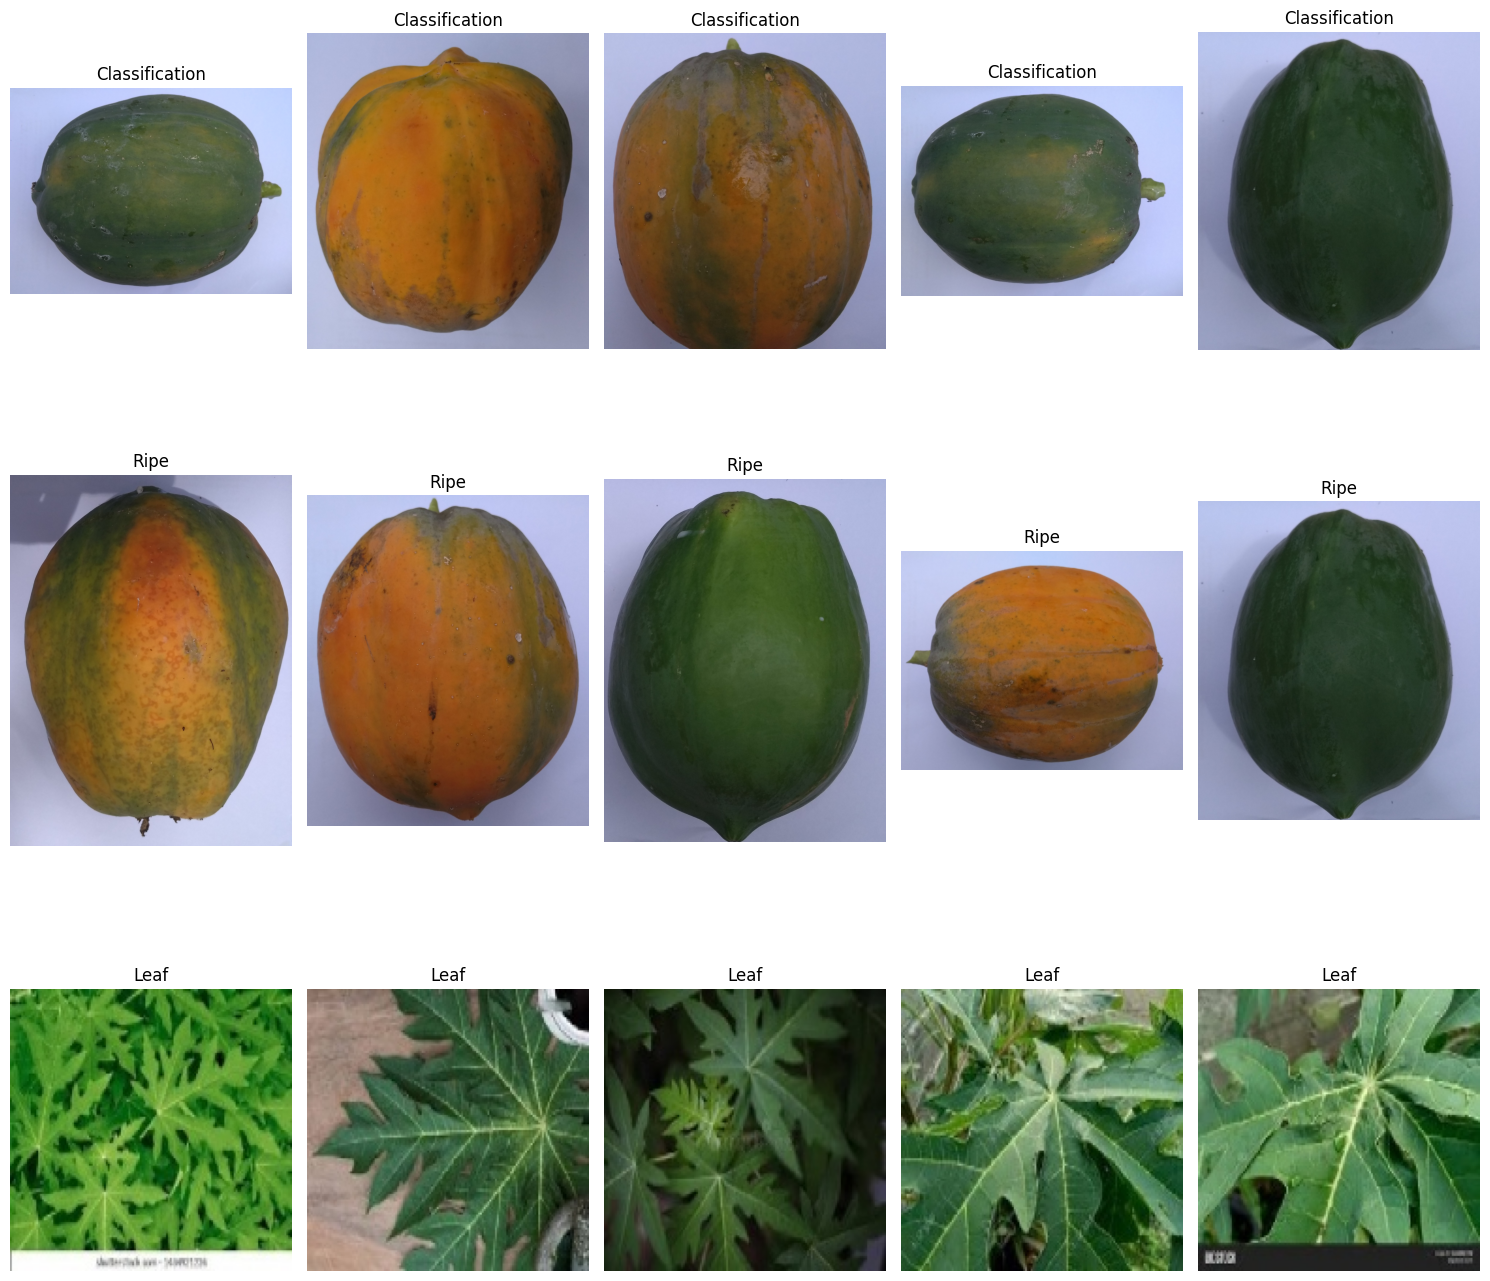

In [11]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Define dataset path
base_dir = "C:/Users/hp/Desktop/cyberpunker/papaya_dataset"
categories = ["Classification", "Ripe", "Leaf"]

# Create a dictionary to store image paths per category
category_images = {}

for category in categories:
    category_path = os.path.join(base_dir, category)
    image_files = []

    # Walk through directories to find images
    for root, _, files in os.walk(category_path):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')):
                image_files.append(os.path.join(root, file))

    # Store images (if available)
    if image_files:
        category_images[category] = image_files

# Check if we found images
if not category_images:
    print("No images found in any category.")
else:
    # Define the number of images per category to display
    images_per_category = 5

    # Create a subplot for each category
    fig, axes = plt.subplots(len(category_images), images_per_category, figsize=(15, 5 * len(category_images)))

    # Ensure axes are iterable for a single category case
    if len(category_images) == 1:
        axes = [axes]

    for ax_row, (category, images) in zip(axes, category_images.items()):
        selected_images = random.sample(images, min(images_per_category, len(images)))

        for ax, img_path in zip(ax_row, selected_images):
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(category)
            ax.axis("off")

    plt.tight_layout()
    plt.show()


In [14]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
base_dir = "C:/Users/hp/Desktop/cyberpunker/papaya_dataset"

# Define batch size and image size
batch_size = 32
img_height = 224
img_width = 224

# Create ImageDataGenerator for training (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",  # Use 'binary' if only 2 classes
    subset="training"
)

# Load validation data
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Get class indices (to verify labels)
print("Class labels:", train_generator.class_indices)


Found 1118 images belonging to 6 classes.
Found 278 images belonging to 6 classes.
Class labels: {'Classification': 0, 'Leaf': 1, 'Papaya_Classification': 2, 'Papaya_Image': 3, 'Papaya_Leaf': 4, 'Ripe': 5}


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),  # Prevent overfitting
    Dense(len(train_generator.class_indices), activation="softmax")  # Output layer
])

# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Model summary
model.summary()


C:\Users\hp\Desktop\cyberpunker\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┓
┃ Layer       ┃ Output  ┃ Par… ┃
┃ (type)      ┃ Shape   ┃    # ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━┩
│ conv2d      │ (None,  │  896 │
│ (Conv2D)    │ 222,    │      │
│             │ 222,    │      │
│             │ 32)     │      │
├─────────────┼─────────┼──────┤
│ max_poolin… │ (None,  │    0 │
│ (MaxPoolin… │ 111,    │      │
│             │ 111,    │      │
│             │ 32)     │      │
├─────────────┼─────────┼──────┤
│ conv2d_1    │ (None,  │ 18,… │
│ (Conv2D)    │ 109,    │      │
│             │ 109,    │      │
│             │ 64)     │      │
├─────────────┼─────────┼──────┤
│ max_poolin… │ (None,  │    0 │
│ (MaxPoolin… │ 54, 54, │      │
│             │ 64)     │      │
├─────────────┼─────────┼──────┤
│ conv2d_2    │ (None,  │ 73,… │
│ (Conv2D)    │ 52, 52, │      │
│             │ 128)    │      │
├─────────────┼─────────┼──────┤
│ max_poolin… │ (None,  │    0 │
│ (MaxPoolin… │ 26, 26, │      │
│             │ 128)    │      │
├─────────────┼─────────┼──────┤
│ flatten     │ (None,  │    0 │
│ (Flatten)   │ 86528)  │      │
├─────────────┼─────────┼──────┤
│ dense       │ (None,  │ 11,… │
│ (Dense)     │ 128)    │      │
├─────────────┼─────────┼──────┤
│ dropout     │ (None,  │    0 │
│ (Dropout)   │ 128)    │      │
├─────────────┼─────────┼──────┤
│ dense_1     │ (None,  │  774 │
│ (Dense)     │ 6)      │      │
└─────────────┴─────────┴──────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
epochs = 10  # Increase for better results
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


C:\Users\hp\Desktop\cyberpunker\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.2005 - loss: 1.9723 - val_accuracy: 0.2770 - val_loss: 1.4492
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.2597 - loss: 1.4709 - val_accuracy: 0.2626 - val_loss: 1.3308
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.2633 - loss: 1.3821 - val_accuracy: 0.2770 - val_loss: 1.3079
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.2886 - loss: 1.3692 - val_accuracy: 0.3237 - val_loss: 1.2973
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.2412 - loss: 1.3432 - val_accuracy: 0.2806 - val_loss: 1.3072
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.2683 - loss: 1.3283 - val_accuracy: 0.3165 - val_loss: 1.2972
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2910 - loss: 1.3174 - val_accuracy: 0.2806 - val_loss: 1.2998
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.2573 - loss: 1.3043 - val_accuracy: 0.2950 - val_los

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

# Build the CNN Model with Dropout for regularization
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
epochs = 20
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# Evaluate model on validation data
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Save model for future use in the native Keras format
model.save("C:/Users/hp/Desktop/cyberpunker/papaya_model.h5")


9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 911ms/step - accuracy: 0.3284 - loss: 1.2848


Validation Accuracy: 31.65%


In [20]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load pre-trained MobileNetV2
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")

# Freeze base layers
base_model.trainable = False

# Add custom layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation="softmax")
])

# Compile and train (same steps as before)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save model for future use in HDF5 format
model.save("C:/Users/hp/Desktop/cyberpunker/papaya_model.h5")


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.2476 - loss: 1.9386 - val_accuracy: 0.3094 - val_loss: 1.3370
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.2622 - loss: 1.4666 - val_accuracy: 0.3094 - val_loss: 1.3336
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.2487 - loss: 1.4028 - val_accuracy: 0.2950 - val_loss: 1.3167
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.2628 - loss: 1.3640 - val_accuracy: 0.2986 - val_loss: 1.3036
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.2964 - loss: 1.3204 - val_accuracy: 0.2878 - val_loss: 1.3051
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.2460 - loss: 1.3340 - val_accuracy: 0.2734 - val_loss: 1.2977
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.2749 - loss: 1.3124 - val_accuracy: 0.2806 - val_loss: 1.2938
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.2888 - loss: 1.3075 - val_accuracy: 0.2914 - val_loss:

In [21]:
# Evaluate model on validation data
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Save model for future use in HDF5 format
model.save("C:/Users/hp/Desktop/cyberpunker/papaya_model.h5")


9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.2681 - loss: 1.2941


Validation Accuracy: 28.78%


: 

: 

: 

: 

: 

: 